In [21]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import time
now = time.strftime('%d%m%Y%H%M%S')

In [22]:
# get covid-19 test data tables from CTV News site and create dfs by province
url_ctv = 'https://www.ctvnews.ca/health/coronavirus/tracking-every-case-of-covid-19-in-canada-1.4852102'
html_ctv = requests.get(url_ctv).content
df_list_ca = pd.read_html(html_ctv)
df_ca = df_list_ca[0:2]
df_bc = df_list_ca[2:5]
df_ab = df_list_ca[5:8]
df_sk = df_list_ca[8:11]
df_mb = df_list_ca[11:14]
df_on = df_list_ca[14:17]
df_qc = df_list_ca[17:20]
df_nb = df_list_ca[20:23]
df_ns = df_list_ca[23:26]
df_pe = df_list_ca[26:29]
df_nf = df_list_ca[29:32]

In [23]:
# isolate test number from each table - there has got to be a better way
bc_t = df_bc[2]
bc_t.to_csv('bc_t.csv')
bc_t1 = pd.read_csv('bc_t.csv')
bc_tests = bc_t1['Administered'].values

ab_t = df_ab[2]
ab_t.to_csv('ab_t.csv')
ab_t1 = pd.read_csv('ab_t.csv')
ab_tests = ab_t1['Administered'].values

sk_t = df_sk[2]
sk_t.to_csv('sk_t.csv')
sk_t1 = pd.read_csv('sk_t.csv')
sk_tests = sk_t1['Administered'].values

mb_t = df_mb[2]
mb_t.to_csv('mb_t.csv')
mb_t1 = pd.read_csv('mb_t.csv')
mb_tests = mb_t1['Administered'].values

on_t = df_on[2]
on_t.to_csv('on_t.csv')
on_t1 = pd.read_csv('on_t.csv')
on_tests = on_t1['Administered'].values

qc_t = df_qc[2]
qc_t.to_csv('qc_t.csv')
qc_t1 = pd.read_csv('qc_t.csv')
qc_tests = qc_t1['Administered'].values

nb_t = df_nb[2]
nb_t.to_csv('nb_t.csv')
nb_t1 = pd.read_csv('nb_t.csv')
nb_tests = nb_t1['Administered'].values

ns_t = df_ns[2]
ns_t.to_csv('ns_t.csv')
ns_t1 = pd.read_csv('ns_t.csv')
ns_tests = ns_t1['Administered'].values

pe_t = df_pe[2]
pe_t.to_csv('pe_t.csv')
pe_t1 = pd.read_csv('pe_t.csv')
pe_tests = pe_t1['Administered'].values

nf_t = df_nf[2]
nf_t.to_csv('nf_t.csv')
nf_t = pd.read_csv('nf_t.csv')
nf_tests = nf_t['Administered'].values

In [24]:
# New Brunswick the last province not reporting testing numbers, check for data is a string
print(type(nb_tests[0]))
print(nb_tests[0])

<class 'str'>
---


In [5]:
# if nb_test is still string, insert 0 and delete string
if nb_tests[0].isdigit() == False:
    nb_tests = np.insert(nb_tests, 1, 0)
    nb_tests = np.delete(nb_tests, 0)
nb_tests

array([0], dtype=object)

In [6]:
# create province list and concat prov tests arrays
prov_list = ['BC', 'AB', 'SK', 'MB', 'ON', 'QC', 'NB', 'NS', 'PE', 'NF']
arrays = [bc_tests, ab_tests, sk_tests, mb_tests, on_tests, qc_tests, nb_tests, ns_tests, pe_tests, nf_tests]
prov_tests = list(np.concatenate(arrays))
prov_tests

[17912, 23742, 3917, 3801, 26419, 10935, 0, 1835, 240, 901]

In [7]:
# create test dataframe
df_tests = pd.DataFrame(list(zip(prov_list, prov_tests)), columns=['Province', 'Test Count'])
df_tests

,Province,Test Count
0,BC,17912
1,AB,23742
2,SK,3917
3,MB,3801
4,ON,26419
5,QC,10935
6,NB,0
7,NS,1835
8,PE,240
9,NF,901


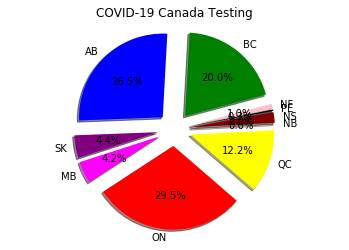

In [9]:
# pie chart for canada covid-19 tests
can_prov = df_tests['Province'].values
can_counts = df_tests['Test Count'].values
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2)
colors = ['green', 'blue', 'purple', 'magenta', 'red', 'yellow', 'orange', 'maroon', 'black', 'pink']
plt.pie(can_counts,labels=can_prov,autopct='%1.1f%%', startangle=15, shadow = True, colors= colors, explode=explode)
plt.title('COVID-19 Canada Testing')
plt.axis('equal')
plt.show()

In [10]:
# save to csv run covid-19 test data
df_tests.to_csv('covid19_can_testing'+ now +'.csv')

In [11]:
df_tests_sorted = df_tests.sort_values('Test Count', ascending=False, ignore_index=True)

In [12]:
total_tests = df_tests_sorted['Test Count'].values.sum()

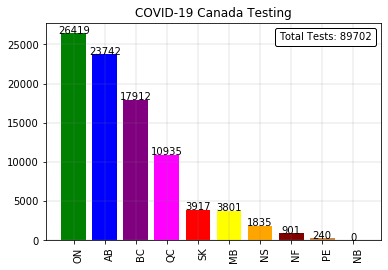

In [13]:
# bar chart provincial covid-19 test data, with summary of total tests
can_prov = df_tests_sorted['Province'].values
can_counts = df_tests_sorted['Test Count'].values
colors = ['green', 'blue', 'purple', 'magenta', 'red', \
          'yellow', 'orange', 'maroon', 'peru', 'firebrick']
fig, ax = plt.subplots()  # Create a figure containing a single axes.

plt.xticks(rotation=90, va='top', ha='left', fontsize=10)

ax.grid(color='grey', linestyle='-', linewidth=0.2)
ax.bar(can_prov, can_counts, color=colors)  # Plot some data on the axes.
ax.annotate(str(can_counts[0]), xy=(can_prov[0],can_counts[0] ), color="black", ha="center")
ax.annotate(str(can_counts[1]), xy=(can_prov[1],can_counts[1] ), color="black", ha="center")
ax.annotate(str(can_counts[2]), xy=(can_prov[2],can_counts[2] ), color="black", ha="center")
ax.annotate(str(can_counts[3]), xy=(can_prov[3],can_counts[3] ), color="black", ha="center")
ax.annotate(str(can_counts[4]), xy=(can_prov[4],can_counts[4] ), color="black", ha="center")
ax.annotate(str(can_counts[5]), xy=(can_prov[5],can_counts[5] ), color="black", ha="center")
ax.annotate(str(can_counts[6]), xy=(can_prov[6],can_counts[6] ), color="black", ha="center")
ax.annotate(str(can_counts[7]), xy=(can_prov[7],can_counts[7] ), color="black", ha="center")
ax.annotate(str(can_counts[8]), xy=(can_prov[8],can_counts[8] ), color="black", ha="center")
ax.annotate(str(can_counts[9]), xy=(can_prov[9],can_counts[9] ), color="black", ha="center")

from matplotlib.offsetbox import AnchoredText
at = AnchoredText('Total Tests: ' + str(total_tests),
                  prop=dict(size=10), frameon=True,
                  loc='upper right',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)



plt.title('COVID-19 Canada Testing')
#plt.legend(can_prov, loc='upper right')
plt.savefig('can_covid-19_total_testing'+ now +'.png')
plt.show()